In [ ]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOAD THE DATASET

df = pd.read_csv(r"C:\Users\kumar\Academic_Decision_Support_System\data\raw\student_performance_balanced.csv")

df.head()


,student_id,study_hours_per_day,attendance_percentage,absences,sleep_hours,stress_level,motivation_level,family_support,school_support,activity_level,G1,G2,stress_score,motivation_score,family_support_score,school_support_score,activity_score,avg_grade,performance_score,pass_fail
0,1,2.6,71,9,4.5,Low,Medium,Medium,Medium,Low,37,34,0,1,1,1,0,35.5,34.7,Fail
1,2,5.7,75,17,5.0,Low,Medium,Low,Medium,Low,70,32,0,1,0,1,0,51.0,46.6,Fail
2,3,4.5,83,7,8.6,Low,Low,High,Medium,Low,32,99,0,0,2,1,0,65.5,52.6,Pass
3,4,3.8,78,20,6.1,Low,High,Medium,Low,Medium,98,36,0,2,1,0,1,67.0,50.5,Pass
4,5,1.4,67,10,6.0,High,Low,Low,High,Medium,43,79,2,0,0,2,1,61.0,39.6,Fail


In [3]:

# Dataset shape
df.shape


(1000, 20)

In [4]:

# Column info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             1000 non-null   int64  
 1   study_hours_per_day    1000 non-null   float64
 2   attendance_percentage  1000 non-null   int64  
 3   absences               1000 non-null   int64  
 4   sleep_hours            1000 non-null   float64
 5   stress_level           1000 non-null   object 
 6   motivation_level       1000 non-null   object 
 7   family_support         1000 non-null   object 
 8   school_support         1000 non-null   object 
 9   activity_level         1000 non-null   object 
 10  G1                     1000 non-null   int64  
 11  G2                     1000 non-null   int64  
 12  stress_score           1000 non-null   int64  
 13  motivation_score       1000 non-null   int64  
 14  family_support_score   1000 non-null   int64  
 15  schoo

In [5]:

# Summary statistics
df.describe()


,student_id,study_hours_per_day,attendance_percentage,absences,sleep_hours,G1,G2,stress_score,motivation_score,family_support_score,school_support_score,activity_score,avg_grade,performance_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,3.196700,79.433000,12.296000,6.59060,63.879000,64.73900,0.77600,0.880000,0.916000,0.845000,0.849000,64.309000,48.146500
std,288.819436,1.605913,11.461102,7.290373,1.42008,20.165838,19.78733,0.74725,0.700064,0.739927,0.715183,0.764712,14.201838,7.147057
min,1.000000,0.500000,60.000000,0.000000,4.00000,30.000000,30.00000,0.00000,0.000000,0.000000,0.000000,0.000000,31.500000,28.600000
25%,250.750000,1.800000,70.000000,6.000000,5.40000,46.000000,48.00000,0.00000,0.000000,0.000000,0.000000,0.000000,54.500000,43.100000
50%,500.500000,3.200000,79.000000,12.000000,6.70000,63.000000,66.00000,1.00000,1.000000,1.000000,1.000000,1.000000,64.500000,48.150000
75%,750.250000,4.600000,89.250000,19.000000,7.80000,81.000000,81.00000,1.00000,1.000000,1.000000,1.000000,1.000000,74.500000,53.400000
max,1000.000000,6.000000,99.000000,24.000000,9.00000,99.000000,99.00000,2.00000,2.000000,2.000000,2.000000,2.000000,98.500000,68.900000


In [6]:

# Pass/Fail distribution
df['pass_fail'].value_counts()


pass_fail
Fail    589
Pass    411
Name: count, dtype: int64

In [7]:

# Correlation check
df.corr(numeric_only=True)


,student_id,study_hours_per_day,attendance_percentage,absences,sleep_hours,G1,G2,stress_score,motivation_score,family_support_score,school_support_score,activity_score,avg_grade,performance_score
student_id,1.000000,-0.024470,-0.020713,-0.067651,0.023484,0.031972,0.014526,-0.024916,-0.011832,0.000122,-0.020724,-0.050745,0.032819,0.014460
study_hours_per_day,-0.024470,1.000000,0.028070,0.017927,-0.057308,0.029602,-0.050775,-0.011294,0.000182,-0.021546,0.031017,-0.001384,-0.014356,0.446200
attendance_percentage,-0.020713,0.028070,1.000000,0.026797,0.030270,0.063365,0.022833,0.028869,0.050273,0.046669,-0.005359,0.031680,0.060894,0.384567
absences,-0.067651,0.017927,0.026797,1.000000,0.039553,-0.037232,-0.028427,0.034049,0.086400,0.041541,-0.048979,0.026519,-0.046237,-0.115723
sleep_hours,0.023484,-0.057308,0.030270,0.039553,1.000000,0.042766,-0.022363,-0.006420,0.039643,-0.015423,-0.002717,0.014085,0.014784,-0.005045
G1,0.031972,0.029602,0.063365,-0.037232,0.042766,1.000000,0.010738,0.019058,-0.010176,0.001532,0.006611,-0.032019,0.717453,0.606098
G2,0.014526,-0.050775,0.022833,-0.028427,-0.022363,0.010738,1.000000,-0.002672,0.032856,-0.060023,0.025715,0.032719,0.704270,0.548721
stress_score,-0.024916,-0.011294,0.028869,0.034049,-0.006420,0.019058,-0.002672,1.000000,-0.024646,0.011196,0.023001,0.021329,0.011669,-0.042975
motivation_score,-0.011832,0.000182,0.050273,0.086400,0.039643,-0.010176,0.032856,-0.024646,1.000000,-0.034939,-0.029190,-0.011443,0.015664,0.115813
family_support_score,0.000122,-0.021546,0.046669,0.041541,-0.015423,0.001532,-0.060023,0.011196,-0.034939,1.000000,-0.005713,0.032403,-0.040727,0.016147


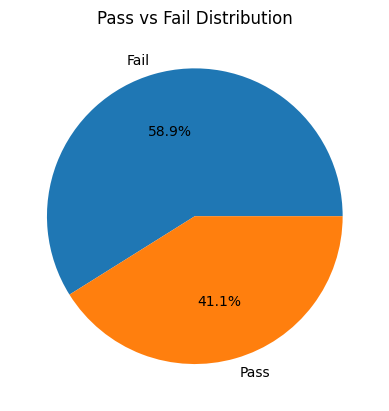

In [8]:
# PASS VS FAIL PIE CHART
df["pass_fail"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Pass vs Fail Distribution")
plt.ylabel("")
plt.show()

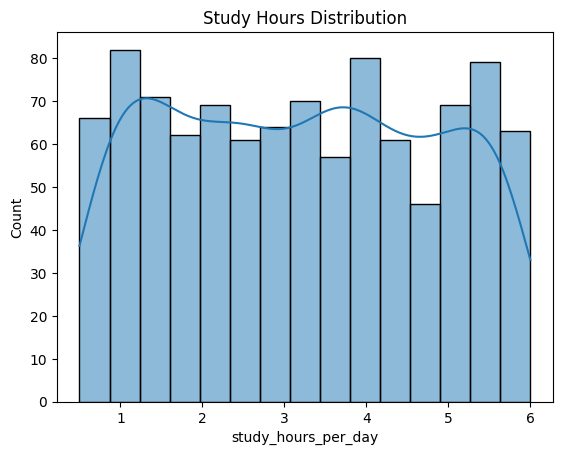

In [9]:
# DISTRIBUTION OF STUDY HOURS
sns.histplot(df["study_hours_per_day"], bins=15, kde=True)
plt.title("Study Hours Distribution")
plt.show()

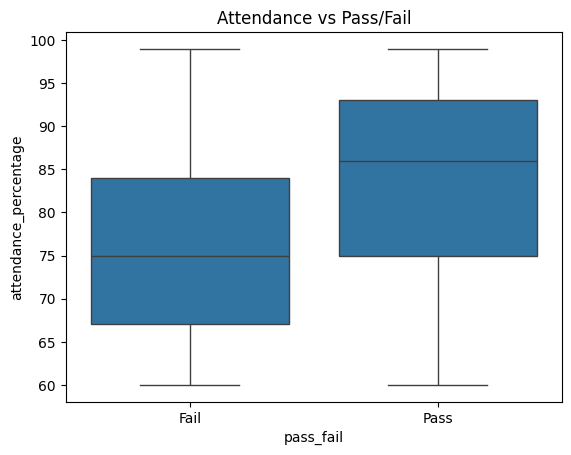

In [10]:
# ATTENDANCE VS RESULT
sns.boxplot(x="pass_fail", y="attendance_percentage", data=df)
plt.title("Attendance vs Pass/Fail")
plt.show()

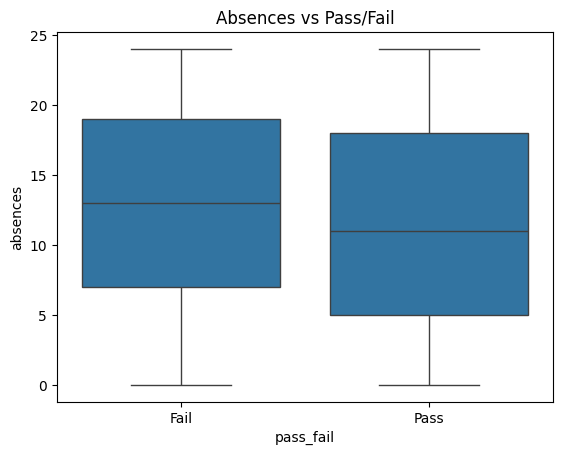

In [11]:
# ABSENCES VS RESULT
sns.boxplot(x="pass_fail", y="absences", data=df)
plt.title("Absences vs Pass/Fail")
plt.show()

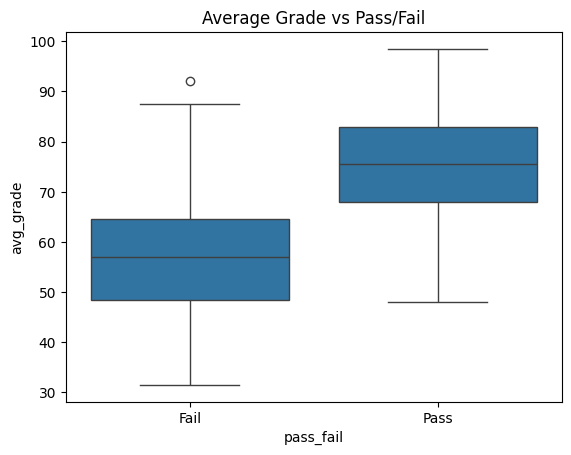

In [12]:
# AVERAGE GRADE VS RESULT
sns.boxplot(x="pass_fail", y="avg_grade", data=df)
plt.title("Average Grade vs Pass/Fail")
plt.show()

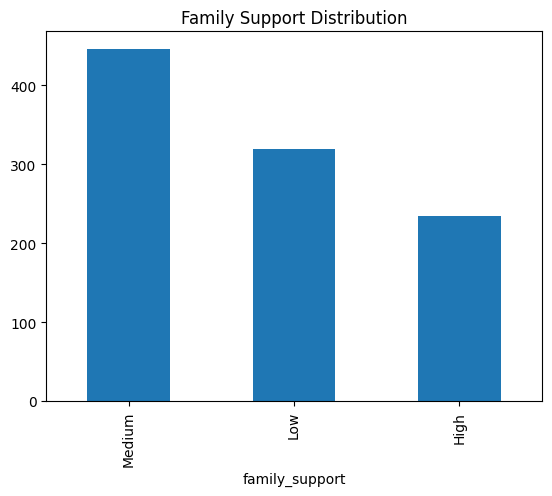

In [13]:
# SUPPORT LEVEL COUNTS
df["family_support"].value_counts().plot(kind="bar")
plt.title("Family Support Distribution")
plt.show()

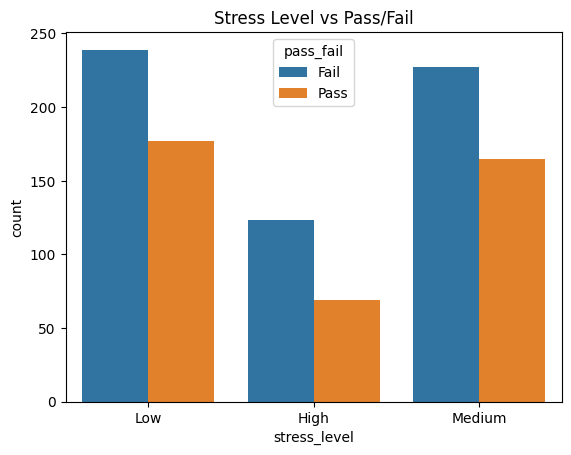

In [14]:
# STRESS LEVEL VS RESULT
sns.countplot(x="stress_level", hue="pass_fail", data=df)
plt.title("Stress Level vs Pass/Fail")
plt.show()